In [31]:
# Import the packages we will use in this project
# For mathematical computation
import pandas as pd
import numpy as np
import os # accessing directory structure

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

# Now we need to read in the data
df = pd.read_csv("C:/Users/aulee/OneDrive/Documents/cleanedagain6.csv")

In [32]:
# Now let's take a look at the data

df

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,...,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,0,1,Tata,Nano Genx,Xe,236447,624,2,2,RWD,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.54
1,1,357,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,...,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.32
2,2,4,Tata,Nano Genx,Xm,272223,624,2,2,RWD,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.21
3,3,6,Datsun,Redi-Go,D,279650,799,3,4,FWD,...,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.75
4,4,881,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,...,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,354,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,...,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.68
1272,1272,880,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,...,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.71
1273,1273,1219,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,...,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.86
1274,1274,355,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,...,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.58


In [33]:
df.describe()

,Unnamed: 0,Serial_Number,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Doors,ARAI_Certified_Mileage,Ground_Clearance,Seating_Capacity,Airbags,Power
count,1276.000000,1276.000000,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,637.500000,637.500000,4.596538e+06,1852.580721,4.361285,3.979624,51.734248,4.551724,20.194655,176.300157,5.268809,3.223354,33.734436
std,368.493781,368.493781,1.214735e+07,1060.065281,1.619598,0.799740,16.088239,0.747065,40.908281,29.752265,1.142683,1.986098,43.151515
min,0.000000,0.000000,2.364470e+05,72.000000,2.000000,1.000000,15.000000,2.000000,3.400000,100.000000,2.000000,1.000000,1.160000
25%,318.750000,318.750000,7.438760e+05,1198.000000,4.000000,4.000000,41.000000,4.000000,16.000000,165.000000,5.000000,2.000000,17.165000
50%,637.500000,637.500000,1.060064e+06,1497.000000,4.000000,4.000000,45.000000,5.000000,19.000000,165.000000,5.000000,2.000000,25.000000
75%,956.250000,956.250000,2.979828e+06,1998.000000,4.000000,4.000000,60.000000,5.000000,23.000000,188.000000,5.000000,5.000000,39.665000
max,1275.000000,1275.000000,2.121554e+08,7993.000000,16.000000,16.000000,105.000000,5.000000,1449.000000,498.000000,16.000000,10.000000,1000.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1276 non-null   int64  
 1   Serial_Number           1276 non-null   int64  
 2   Make                    1276 non-null   object 
 3   Model                   1276 non-null   object 
 4   Variant                 1276 non-null   object 
 5   Ex-Showroom_Price       1276 non-null   int64  
 6   Displacement            1276 non-null   int64  
 7   Cylinders               1276 non-null   int64  
 8   Valves_Per_Cylinder     1276 non-null   int64  
 9   Drivetrain              1276 non-null   object 
 10  Cylinder_Configuration  1276 non-null   object 
 11  Emission_Norm           1276 non-null   object 
 12  Fuel_Tank_Capacity      1276 non-null   float64
 13  Fuel_Type               1276 non-null   object 
 14  Body_Type               1276 non-null   

In [35]:
# Data Types for our columns

print(df.dtypes)

Unnamed: 0                  int64
Serial_Number               int64
Make                       object
Model                      object
Variant                    object
Ex-Showroom_Price           int64
Displacement                int64
Cylinders                   int64
Valves_Per_Cylinder         int64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Body_Type                  object
Doors                       int64
ARAI_Certified_Mileage    float64
Gears                      object
Ground_Clearance          float64
Seating_Capacity            int64
Type                       object
Airbags                     int64
Power                     float64
dtype: object


In [36]:
# Find missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Serial_Number - 0%
Make - 0%
Model - 0%
Variant - 0%
Ex-Showroom_Price - 0%
Displacement - 0%
Cylinders - 0%
Valves_Per_Cylinder - 0%
Drivetrain - 0%
Cylinder_Configuration - 0%
Emission_Norm - 0%
Fuel_Tank_Capacity - 0%
Fuel_Type - 0%
Body_Type - 0%
Doors - 0%
ARAI_Certified_Mileage - 0%
Gears - 0%
Ground_Clearance - 0%
Seating_Capacity - 0%
Type - 0%
Airbags - 0%
Power - 0%


In [37]:
# Duplicate data
df.drop_duplicates()

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,...,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,0,1,Tata,Nano Genx,Xe,236447,624,2,2,RWD,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.54
1,1,357,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,...,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.32
2,2,4,Tata,Nano Genx,Xm,272223,624,2,2,RWD,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.21
3,3,6,Datsun,Redi-Go,D,279650,799,3,4,FWD,...,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.75
4,4,881,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,...,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,354,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,...,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.68
1272,1272,880,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,...,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.71
1273,1273,1219,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,...,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.86
1274,1274,355,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,...,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.58


<AxesSubplot:>

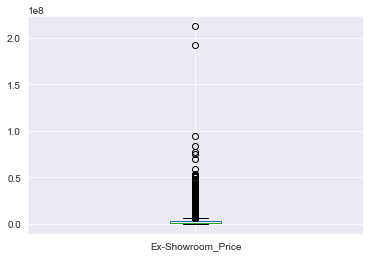

In [38]:
# Are there any Outliers?

df.boxplot(column=['Ex-Showroom_Price'])

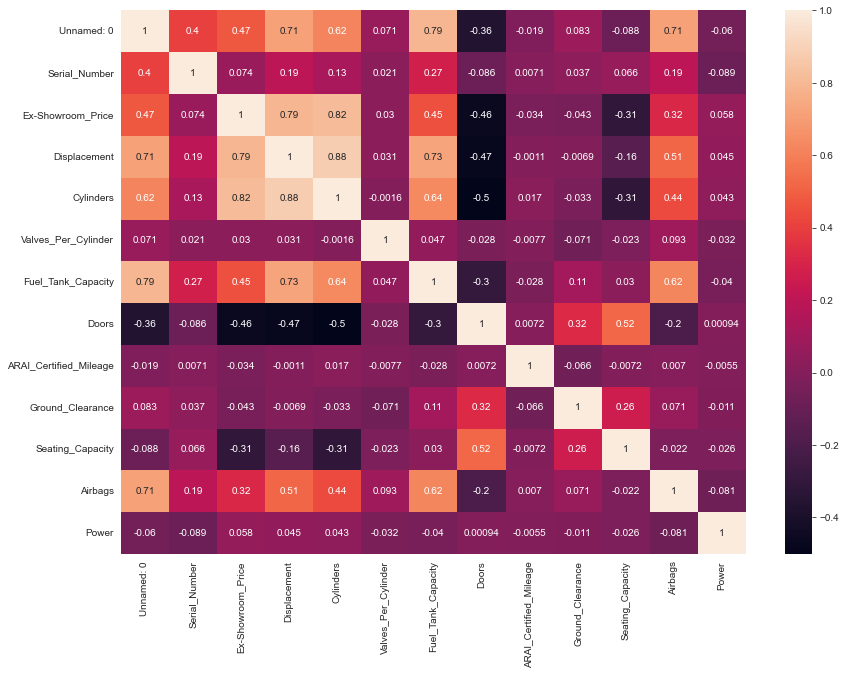

In [39]:
correlation_matrix = df.corr()
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [40]:
# Top 10 companies by gross ex-showroom price

MakePriceSum = df.groupby('Make')[["Ex-Showroom_Price"]].sum()
MakePriceSumSorted = MakePriceSum.sort_values('Ex-Showroom_Price', ascending = False)[:10]
MakePriceSumSorted = MakePriceSumSorted['Ex-Showroom_Price'].astype('int64') 
MakePriceSumSorted

Make
Rolls-Royce         610167011
Mercedes-Benz       540307648
Lamborghini         507700950
Land Rover Rover    444324575
Bugatti             404298334
Ferrari             342979965
Bmw                 305480000
Bentley             243395126
Jaguar              230219067
Audi                224453350
Name: Ex-Showroom_Price, dtype: int64

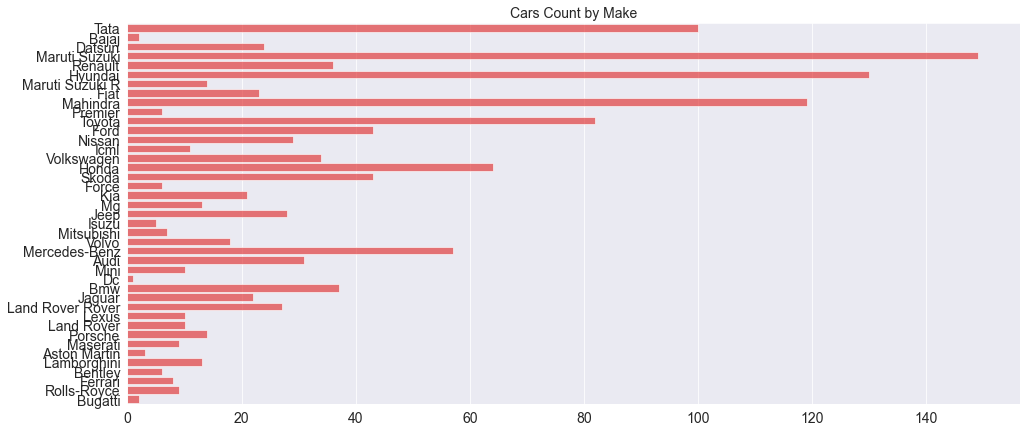

In [41]:
# Cars Count by Make

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Make',alpha=.6,color='Red')
plt.title('Cars Count by Make',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

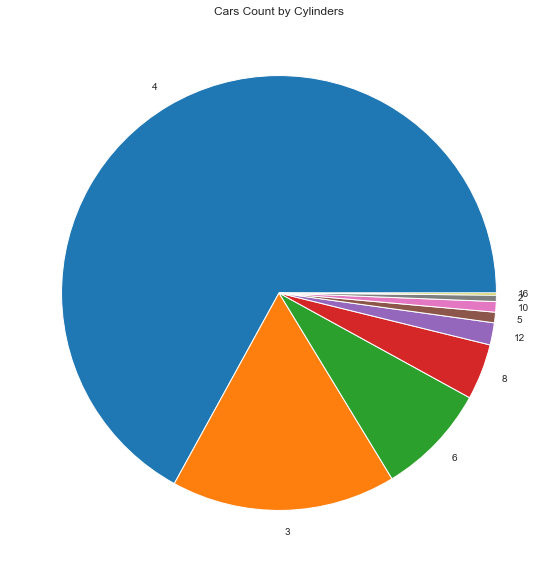

In [42]:
# Cars Count by Cylinders

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Cylinders.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Cylinders")
plt.show()

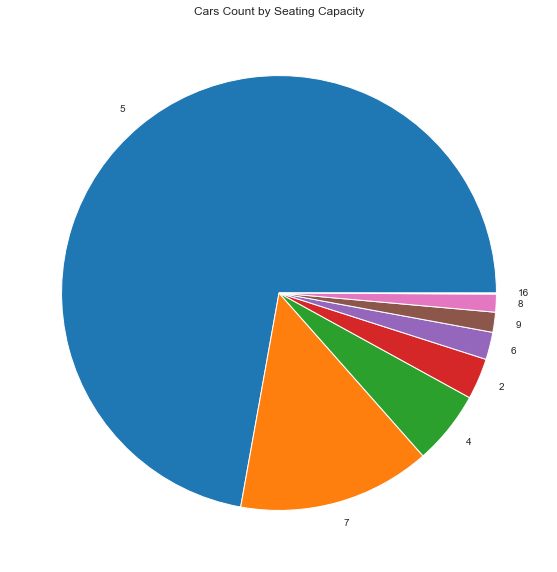

In [43]:
# Cars Count by Seating_Capacity

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Seating_Capacity.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Seating Capacity")
plt.show()

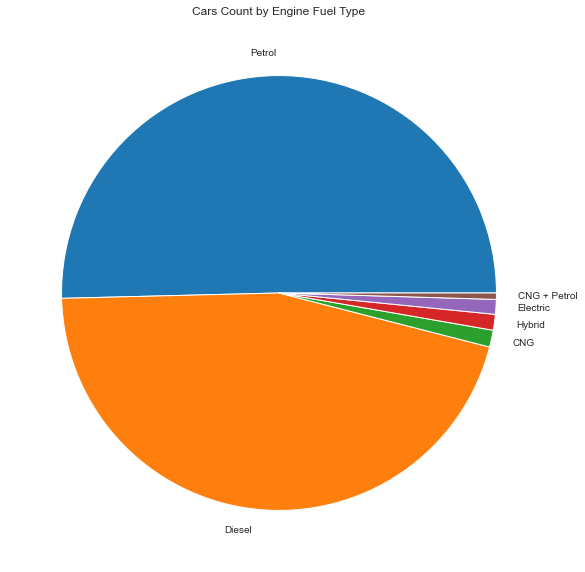

In [44]:
# Cars Count by Engine Fuel Type

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

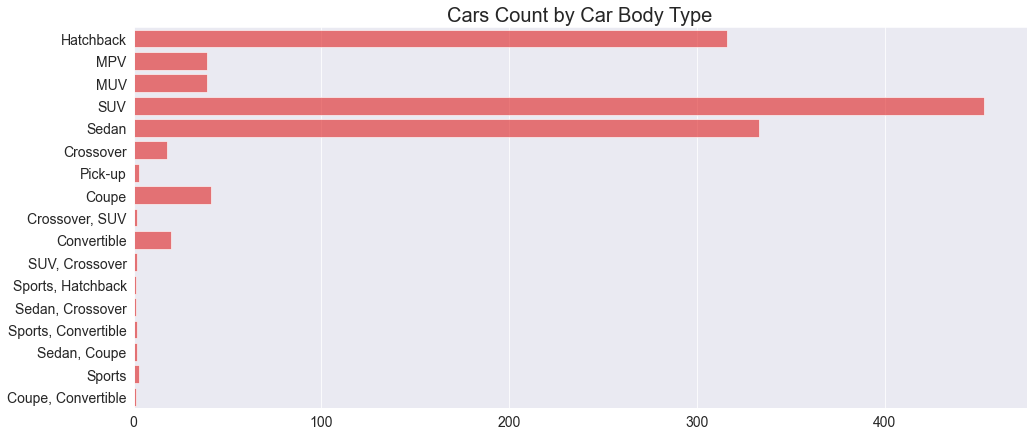

In [45]:
# Cars Count by Car Body Type

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='Red')
plt.title('Cars Count by Car Body Type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [46]:
# SUV's Sedans and hatchbacks seems to be the dominating car types

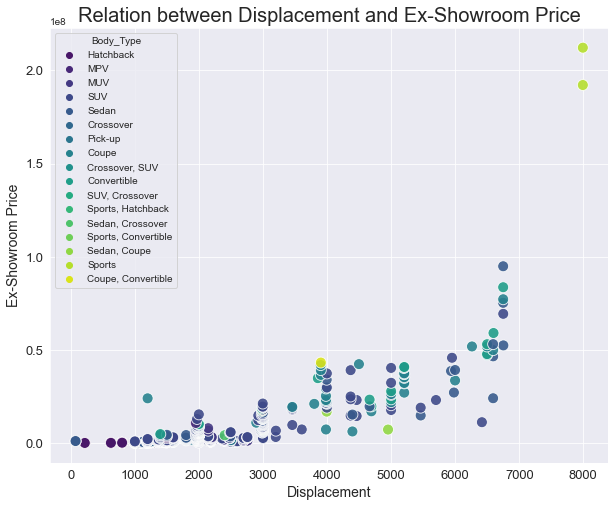

In [47]:
# Relationship between Displacement and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Displacement',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Displacement and Ex-Showroom Price',fontsize=20);

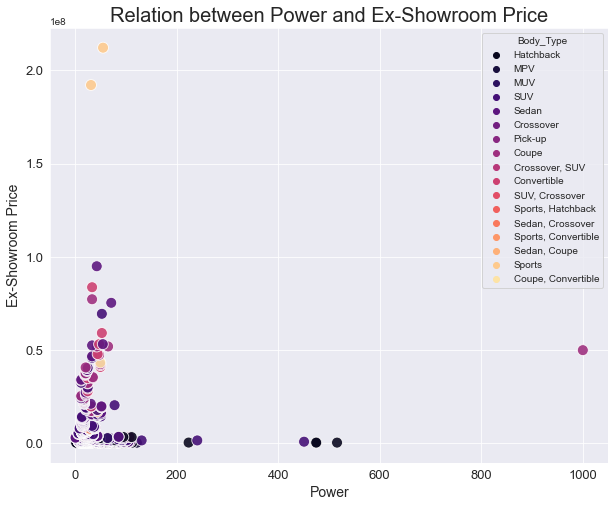

In [48]:
# Relationship between power and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='magma',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Power and Ex-Showroom Price',fontsize=20);

In [49]:
# Horsepower of car is related to car price  
# Hatchbacks are the body type with the least horsepower and price

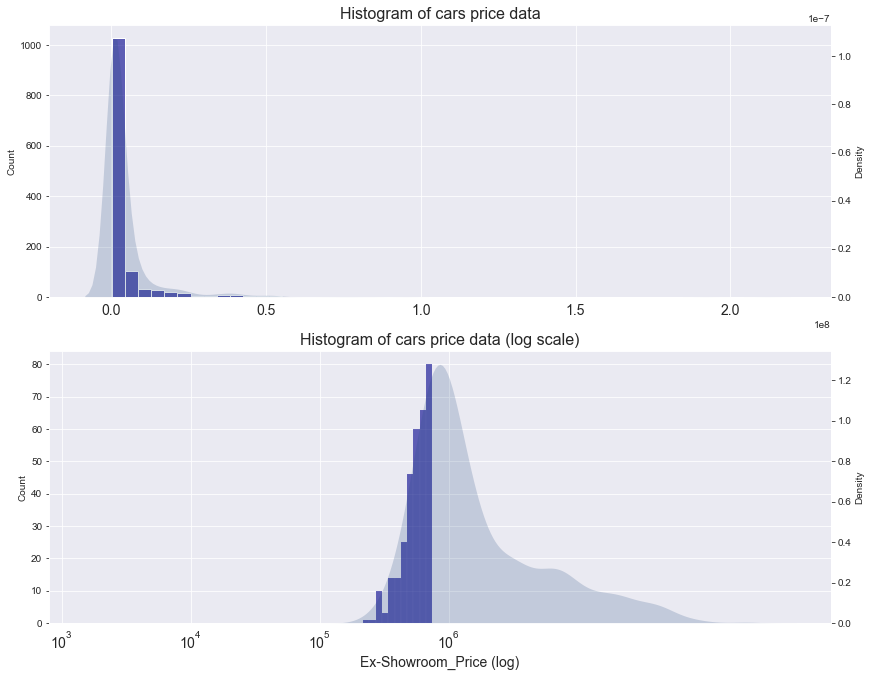

In [50]:
# Checking Ex-Showroom Price distribution using normal and log scales due to the huge difference in prices

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='Ex-Showroom_Price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='Ex-Showroom_Price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Ex-Showroom_Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

In [51]:
# Variance in price can be checked by plotting a box plot

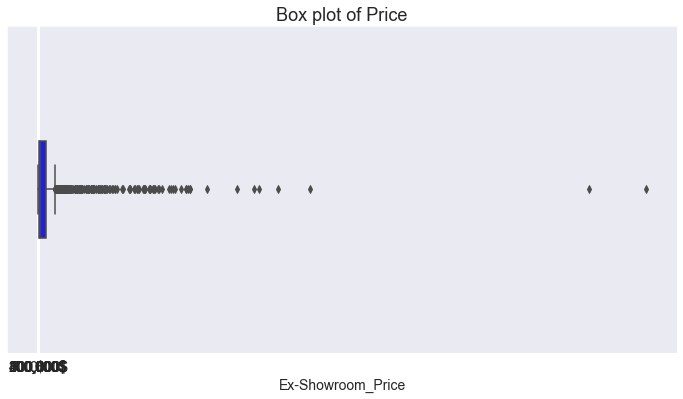

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price',width=.3,color='blue', hue= 'Fuel_Type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('Ex-Showroom_Price',fontsize=14);

In [53]:
# Outliers form a very different type(s) of cars or there are very different categories in the automotive market

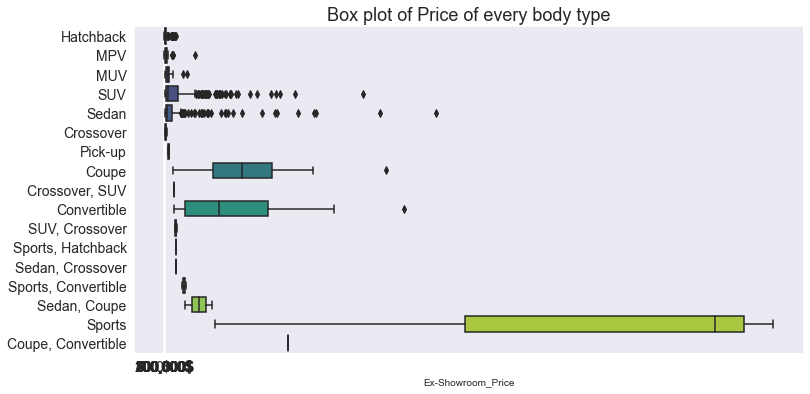

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [55]:
# Car body type affects the price

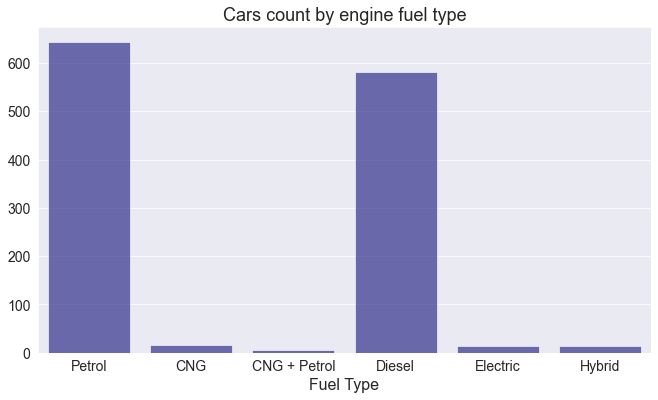

In [56]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='Fuel_Type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

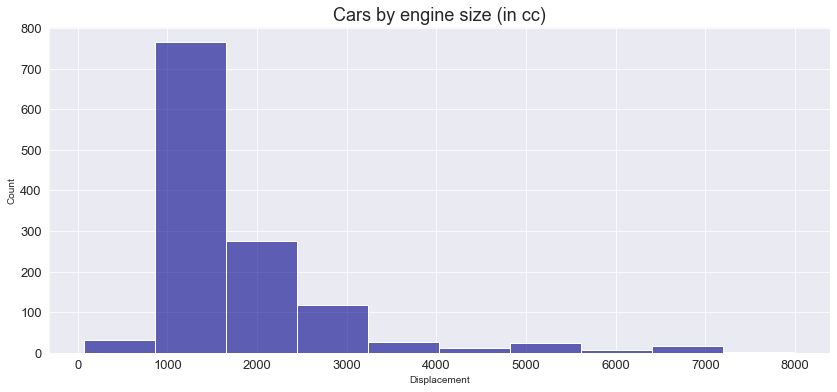

In [57]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in cc)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

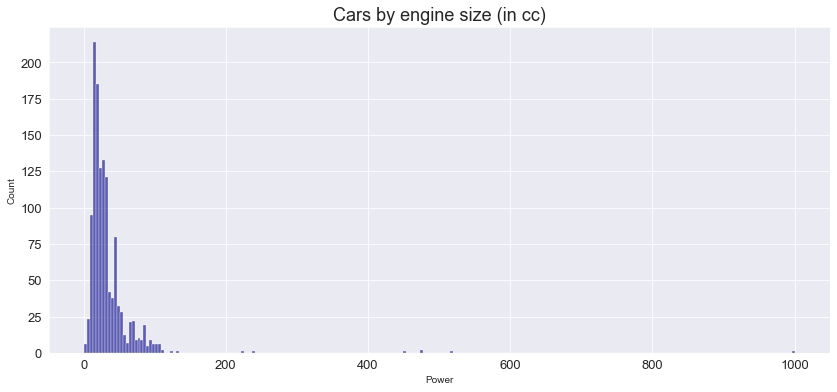

In [58]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in cc)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [59]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

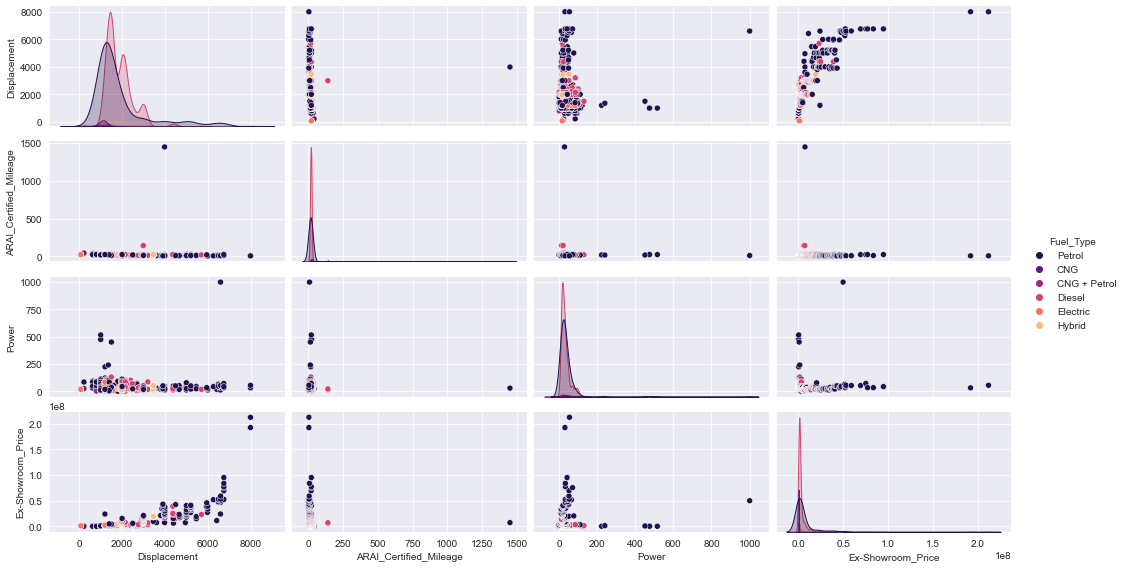

In [60]:
sns.pairplot(df,vars=[ 'Displacement', 'ARAI_Certified_Mileage', 'Power', 'Ex-Showroom_Price'], hue= 'Fuel_Type',
             palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [61]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [62]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

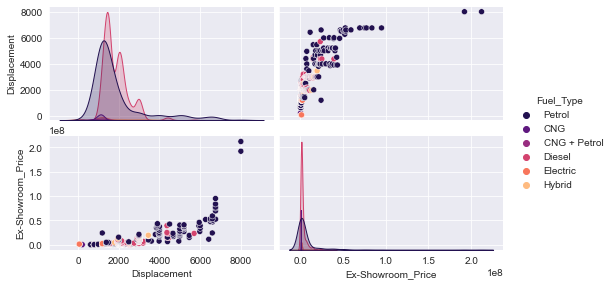

In [63]:
sns.pairplot(df,vars=[ 'Displacement', 'Ex-Showroom_Price'], hue= 'Fuel_Type', palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [64]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();